In [9]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open("C:/Users/X1/Downloads/iris_setosa.jpg")
image2 = Image.open("C:/Users/X1/Downloads/iris_versicolor.jpg")
image3 = Image.open("C:/Users/X1/Downloads/iris_virginica.jpg")

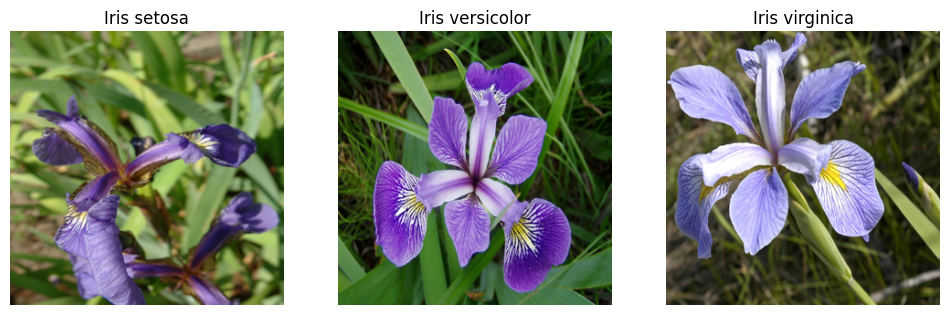

In [10]:
plt.figure(figsize=(12,12));
plt.subplot(1,3,1), plt.imshow(image1.resize((300,300))), plt.axis("off"), plt.title("Iris setosa");
plt.subplot(1,3,2), plt.imshow(image2.resize((300,300))), plt.axis("off"), plt.title("Iris versicolor");
plt.subplot(1,3,3), plt.imshow(image3.resize((300,300))), plt.axis("off"), plt.title("Iris virginica");
plt.show()

In [4]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

In [13]:
# Load dataset
data_path = "C:/Users/X1/Downloads/iris.csv"
data_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df_dataset = pd.read_csv(data_path, names = data_names)

In [14]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (150, 5)
+ Data Types: 
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object
+ Contents: 


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 3


,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [17]:
df_dataset["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

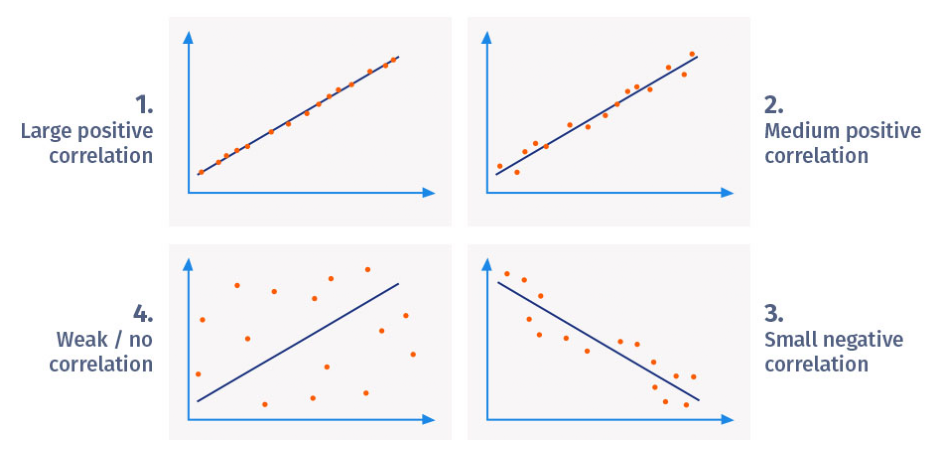

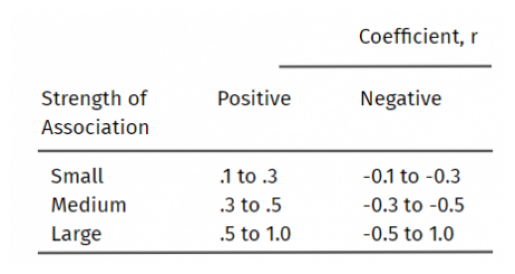

In [19]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("C:/Users/X1/Downloads/corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("C:/Users/X1/Downloads/corr2.png")), plt.axis("off"), plt.show();

In [22]:
# Tạo một bản sao của DataFrame và loại bỏ cột 'class'
df_numerical = df_dataset.drop('class', axis=1)

# Tính toán mối tương quan trên DataFrame chỉ chứa dữ liệu số
correlations = df_numerical.corr(method='pearson')

# Hiển thị kết quả
display.display(correlations)

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


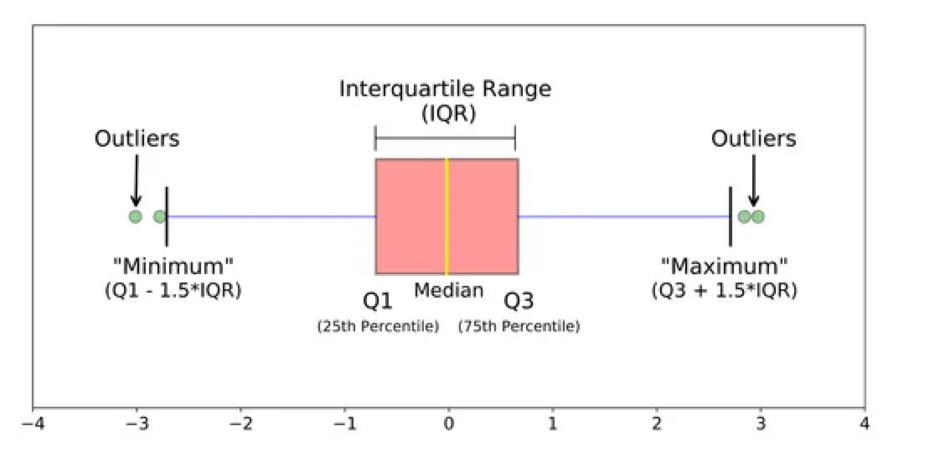

In [24]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("C:/Users/X1/Downloads/boxplots.png")), plt.axis("off"), plt.show();

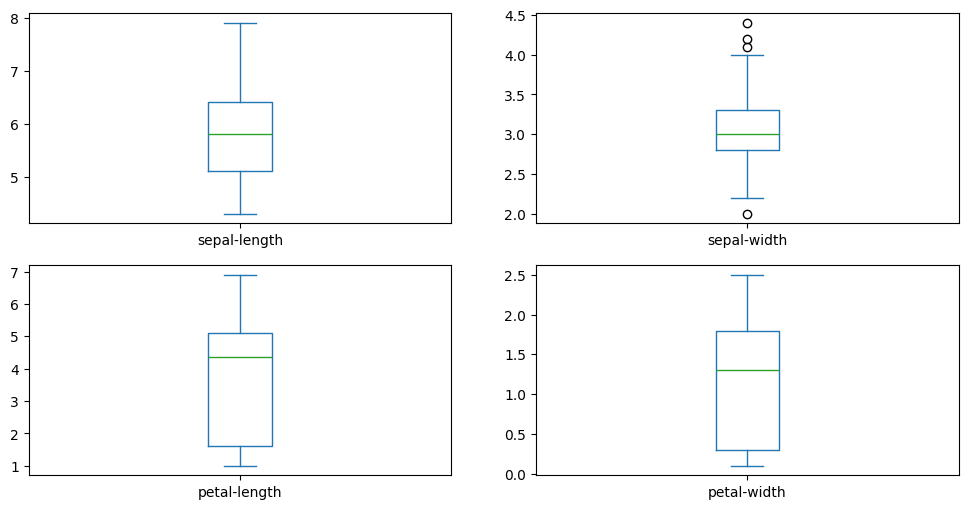

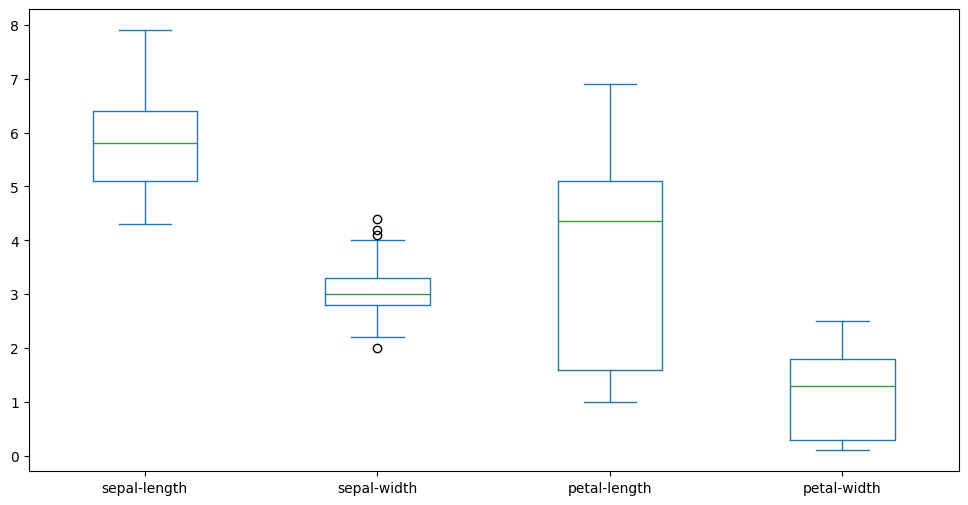

In [25]:
df_dataset.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

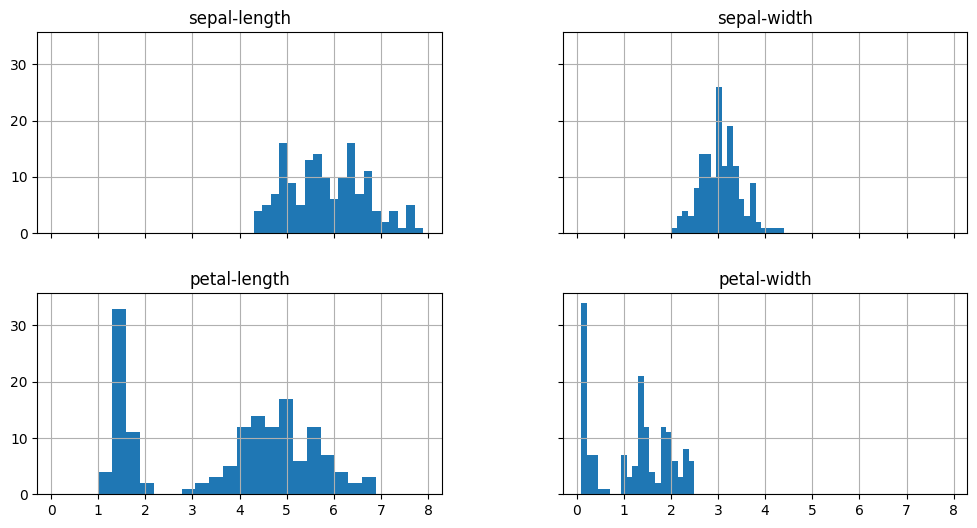

In [26]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

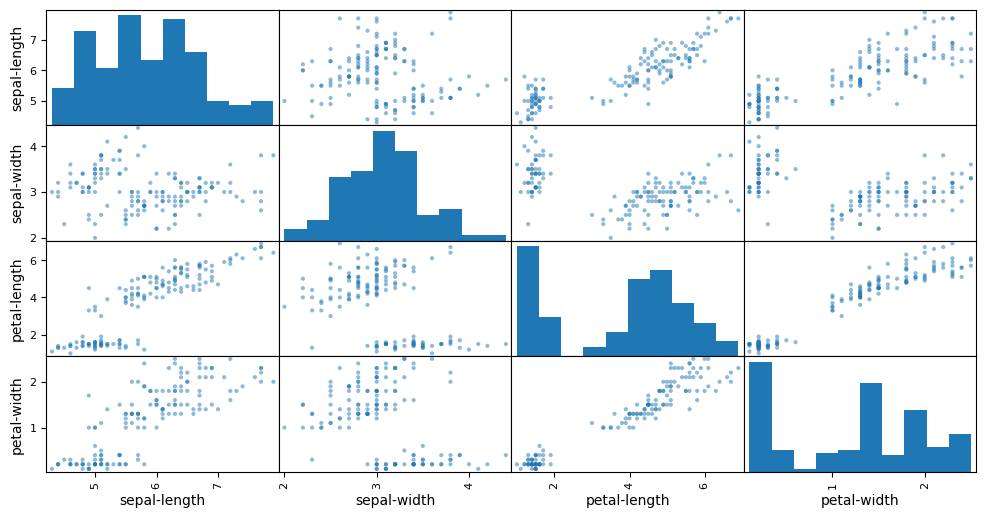

In [27]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

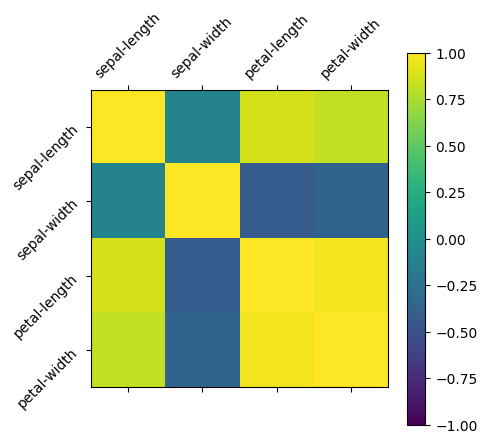

In [28]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,4), rotation = 45);
plt.yticks(np.arange(0,4), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

In [29]:
df_clean = df_dataset.copy()

In [30]:
display.display(df_dataset[df_dataset.duplicated()])

,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [31]:
s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
display.display(df_dataset.query(s_query1))
display.display(df_dataset.query(s_query2))

,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [32]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


In [48]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["class"])
class_names = class_encoder.classes_
print(class_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [49]:
class_encoder.transform(df_clean["class"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
df_clean["class"] = class_encoder.transform(df_clean["class"])
df_clean

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


In [54]:
# Min-Max Normalization
scale_columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
142,0.666667,0.416667,0.711864,0.916667,2
143,0.555556,0.208333,0.677966,0.750000,2
144,0.611111,0.416667,0.711864,0.791667,2
145,0.527778,0.583333,0.745763,0.916667,2


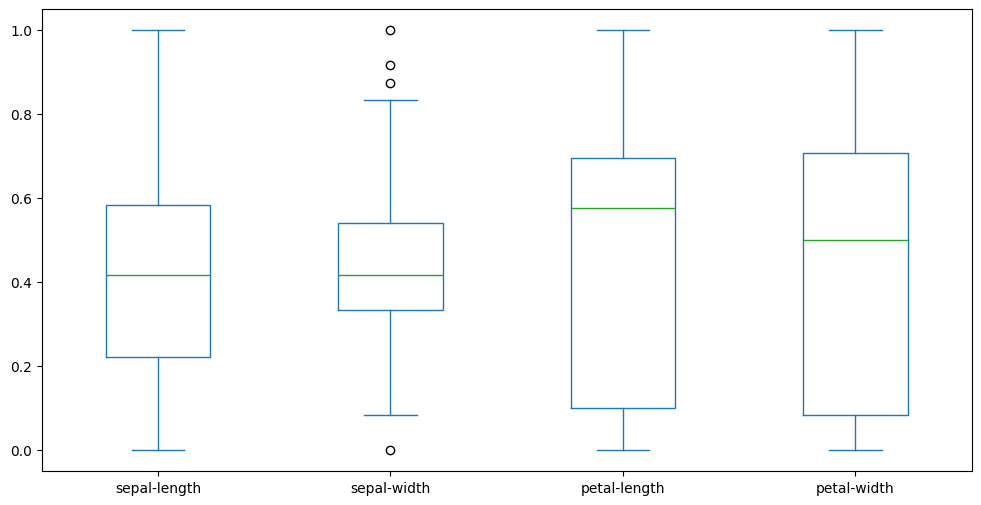

In [55]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [56]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,sepal-length,sepal-width,petal-length,petal-width,class
0,-0.915509,1.019971,-1.357737,-1.335700,0
1,-1.157560,-0.128082,-1.357737,-1.335700,0
2,-1.399610,0.331139,-1.414778,-1.335700,0
3,-1.520635,0.101529,-1.300696,-1.335700,0
4,-1.036535,1.249582,-1.357737,-1.335700,0
...,...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682,2
143,0.536792,-1.276136,0.695748,0.915085,2
144,0.778842,-0.128082,0.809831,1.047484,2
145,0.415766,0.790361,0.923913,1.444682,2


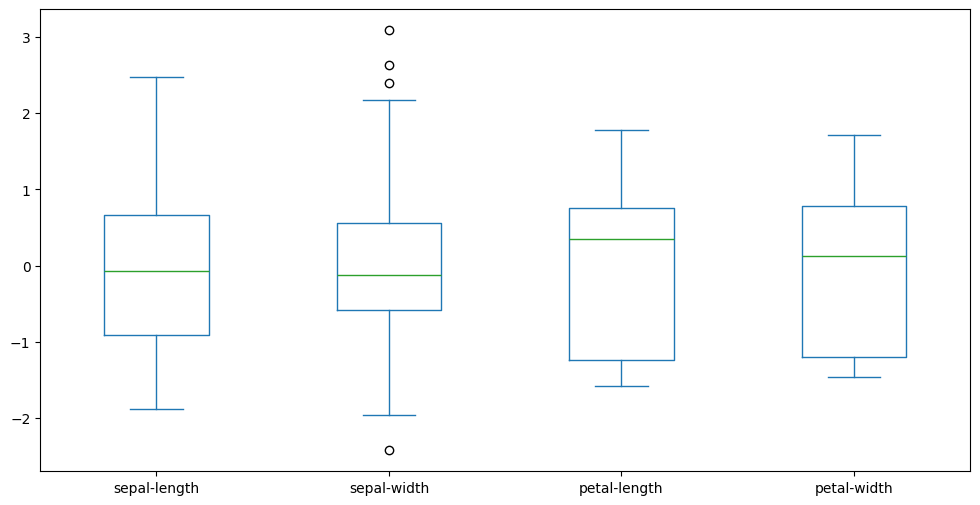

In [57]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [58]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,sepal-length,sepal-width,petal-length,petal-width,class
sepal-length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal-width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal-length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal-width,0.817058,-0.356376,0.961883,1.000000,0.955693
class,0.782904,-0.418348,0.948339,0.955693,1.000000


In [60]:
!pip install openpyxl

# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

df_clean_minmax.to_excel(f'{save_dir}/df_clean_minmax.xlsx', index=False)

df_clean_standard.to_excel(f'{save_dir}/df_clean_standard.xlsx', index=False)

# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



['class_encoder.joblib',
 'df_clean.xlsx',
 'df_clean_minmax.xlsx',
 'df_clean_standard.xlsx']

In [61]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


In [62]:
pd.read_excel(f'{save_dir}/df_clean_minmax.xlsx')

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
142,0.666667,0.416667,0.711864,0.916667,2
143,0.555556,0.208333,0.677966,0.750000,2
144,0.611111,0.416667,0.711864,0.791667,2
145,0.527778,0.583333,0.745763,0.916667,2


In [63]:
pd.read_excel(f'{save_dir}/df_clean_standard.xlsx')

,sepal-length,sepal-width,petal-length,petal-width,class
0,-0.915509,1.019971,-1.357737,-1.335700,0
1,-1.157560,-0.128082,-1.357737,-1.335700,0
2,-1.399610,0.331139,-1.414778,-1.335700,0
3,-1.520635,0.101529,-1.300696,-1.335700,0
4,-1.036535,1.249582,-1.357737,-1.335700,0
...,...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682,2
143,0.536792,-1.276136,0.695748,0.915085,2
144,0.778842,-0.128082,0.809831,1.047484,2
145,0.415766,0.790361,0.923913,1.444682,2


In [64]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)